In [1]:
# Make sure this is commented in VS code
#exec('''import urllib; exec(urllib.request.urlopen('https://raw.githubusercontent.com/NickGMV/visual-tools/main/visual-aids-jupyter8.txt').read())''')# exec('''import urllib; exec(urllib.request.urlopen('https://raw.githubusercontent.com/NickGMV/visual-tools/main/visual-aids-jupyter8.txt').read())''')

<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">

### 10 weeks of Python - Week 5

# Our first SKlearn regression

<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">

### Steps to complete an SKlearn regression in Python


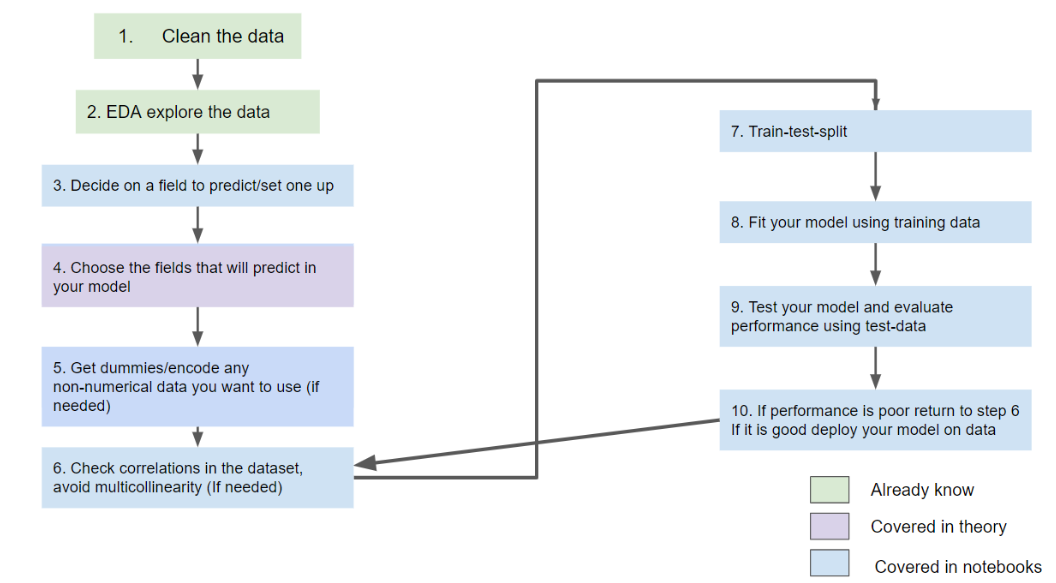

### A quick overview of the data

American health insurance is Expensive! There are number of factors that come in to play in calculating a persons insurance premium, this includes age,dependants,region and sex to name but a few.

This is an ideal place to bring in a model to predict continuous variables like linear regression.

In this case due to the large number of factors multiple linear regression is used in this notebook.

### Imports

In [16]:
import pandas as pd # to read in our data
import numpy as np # extra maths functions
import seaborn as sns # plotting attractive graphs
import matplotlib.pyplot as plt # graphing 

from sklearn.model_selection import train_test_split # have a more accurate test of our model
from sklearn.linear_model import LinearRegression # model type, this actually has the model
from sklearn import metrics # metrics

<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">

## Our first rudimentary Regression

#### 1. Loading and cleaning

In [17]:
# Read the data and set the datetime as the index.
path = '../Assets/Data/bikeshare.csv'


bikes = pd.read_csv(path, index_col='datetime', parse_dates=True)
bikes.head()

season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  count  
datetime                                                             
2011-01-01 00:00:00        81        0.0       3          13     16  
2011-01-01 01:00:00        80        0.0       8          32     40  
2011-01-01 02:00:00        80        0.0       5          27     32  
2011-01-01 03:00:00        75        0.0       3          10     13  
2011-01-01 04:00:00        75        0.0       0           1      1

In [18]:
# Use the .rename() method to rename count to total
bikes.rename(columns={'count':'total_rentals','atemp':'average temperature'}, inplace=True)

In [19]:
# check datatypes
bikes.dtypes

season                   int64
holiday                  int64
workingday               int64
weather                  int64
temp                   float64
average temperature    float64
humidity                 int64
windspeed              float64
casual                   int64
registered               int64
total_rentals            int64
dtype: object

#### 2. Explore the data 

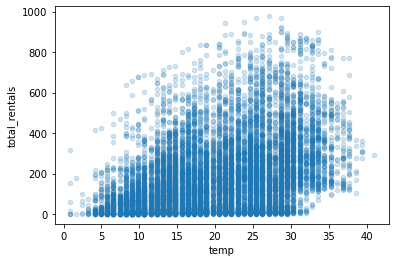

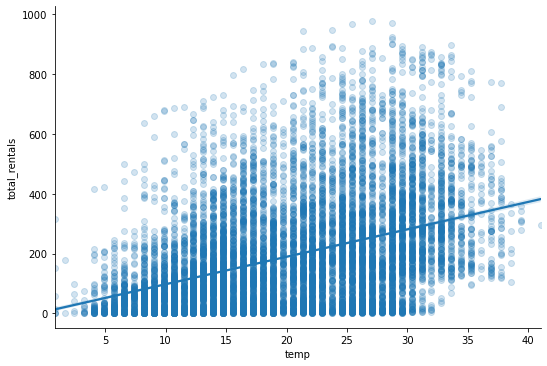

In [20]:
#A: Exploring relationship between total number of riders and temperature
# Pandas scatterplot
bikes.plot(kind='scatter', x='temp', y='total_rentals', alpha=0.2);
    
# Seaborn scatterplot with regression line
sns.lmplot(x='temp', y='total_rentals', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2});

### 3,4,5 and 6  combined

 - We will predict the number of bike riders in any given day
 - In this first model we will only use 1 feature (temperature) to predict
 - This is already a numerical value
 - because we are using only 1 field to predict there can be no multicollinearity

 
 
 ##### We will revisit these steps later

### 7. Setting up a first model (preview of fitting regression models)

#### We will come back to work on train-test-split step 7

In [21]:
# Create X and y.
# temperature appears to be a reasonably good predictor for the number of riders

feature_cols = ['temp'] # this would normally be step 6

X = bikes[feature_cols]

y = bikes['total_rentals']

In [22]:
type(X)

pandas.core.frame.DataFrame

In [23]:
from sklearn.linear_model import LinearRegression

# instantiate the model
lr = LinearRegression()

#linreg will not be trained
linreg = LinearRegression()

# training the model
lr.fit(X, y)
# y = mx+b

# look at the model coefficients
print(lr.intercept_) # intercept (b) (refferred to as the bias or error in ML)
print(lr.coef_[0]) # m (refferred to as beta in ML)

# so our model is... total_rentals = 9.17*temp + 6.04

6.04621295961681
9.170540481426237


### 8. Evaluate Performance

Once a model is built we want to measure its success

In [27]:
from sklearn import metrics
import numpy as np

true = y
pred = lr.predict(X)

# take the mean of the size of each error
print('MAE:', metrics.mean_absolute_error(true, pred)) 

# take the mean of all the errors squared (punishes big errors much more severely)
print('MSE:', metrics.mean_squared_error(true, pred))

# A balance between MAE and MSE
print('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

MAE: 126.68417439564077
MSE: 27705.2238053288
RMSE: 166.44886243326746


### 9-12 Finishing up for today

We won't be deploying this model in any meaningful way and have skipped train test split etc so we will stick with what we have, in the next session we will add these steps to begin deploying our model.

In [24]:
# Now we can use this model to predict

# we need to use an array as sklearn regression is coded 
# to be able process whole data sets as opposed to 1 value
new_value = [[-0.5]]

lr.predict(new_value)

#create a function to use these values
def predict_fix(x):
    if x[0][0] <= 0:
        return 0 
    else:
        return lr.predict(x)
    
predict_fix([[25]])

array([235.309725])

In [26]:
# ***Alternate method***
# only works for siple regressions
def predictor(model,value):
    try:
        prediction = model.coef_[0]*float(value) + model.intercept_
    except:
        return '''check the value you input is a number and that your model exists'''
    return prediction

predictor(lr,10)

97.75161777387918

<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">

### Now you try
 Using your cleaned data set (or the practice set)
 
1. Build a simple regression model
2. Find the MAE,MSE and RMSE of the model
3. Get a prediction from your model
#### 4. to get ahead for next session have a look a the demo regression project in the templates folder

In [58]:
# code here

## Issues with judging performance?

### Problems With Training and Testing on the Same Data

- Our goal is to estimate likely performance of a model on **out-of-sample data**.
- But, maximizing the training mean squared error rewards **overly complex models** that won't necessarily generalize.
- Unnecessarily complex models **overfit** the training data.
    - They will do well when tested using the in-sample data.
    - They may do poorly with out-of-sample data.
    - They learn the "noise" in the data rather than the "signal."
    - From Quora: [What is an intuitive explanation of overfitting?](http://www.quora.com/What-is-an-intuitive-explanation-of-overfitting/answer/Jessica-Su)


## THE SOLUTION?  Train-test-split

In [28]:
from sklearn.model_selection import train_test_split

# Split your data into train and test data sets (this is a 70/30 split)
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=42)


In [29]:
# Once we've done this, instead of 'training' our model on all the data, we should ONLY use the train data sets 
lr_tts = LinearRegression()

#training the model
lr_tts.fit(x_train, y_train)

# Now we can use the TEST data (i.e. new data for the model), to get predictions 
y_pred = lr_tts.predict(x_test)
y_pred

array([312.43919791,  45.08014614,  97.06662842, ..., 178.75967202,
       312.43919791,  89.6399881 ])

In [ ]:
### Creating a few train test_splits

In [30]:
# train test splits are randomised so change every time
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

print(f'x_train looks like...{x_train}\n\n\n y_train looks like {y_train}\n\n\n')

x_train looks like...                      temp
datetime                  
2012-09-19 02:00:00  22.14
2011-09-16 09:00:00  18.86
2012-09-14 14:00:00  29.52
2012-05-19 08:00:00  21.32
2012-07-10 02:00:00  28.70
...                    ...
2012-04-09 16:00:00  22.96
2011-01-10 13:00:00   8.20
2012-10-19 16:00:00  25.42
2011-11-09 05:00:00  12.30
2012-07-10 21:00:00  26.24

[7620 rows x 1 columns]


 y_train looks like datetime
2012-09-19 02:00:00      3
2011-09-16 09:00:00    210
2012-09-14 14:00:00    371
2012-05-19 08:00:00    195
2012-07-10 02:00:00     16
                      ... 
2012-04-09 16:00:00    391
2011-01-10 13:00:00     54
2012-10-19 16:00:00    565
2011-11-09 05:00:00     28
2012-07-10 21:00:00     90
Name: total_rentals, Length: 7620, dtype: int64





<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">

### Now you try

Try setting up a train test split on the data set you used in the last exercise

In [ ]:
# code here


<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">


### See you next time


<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">

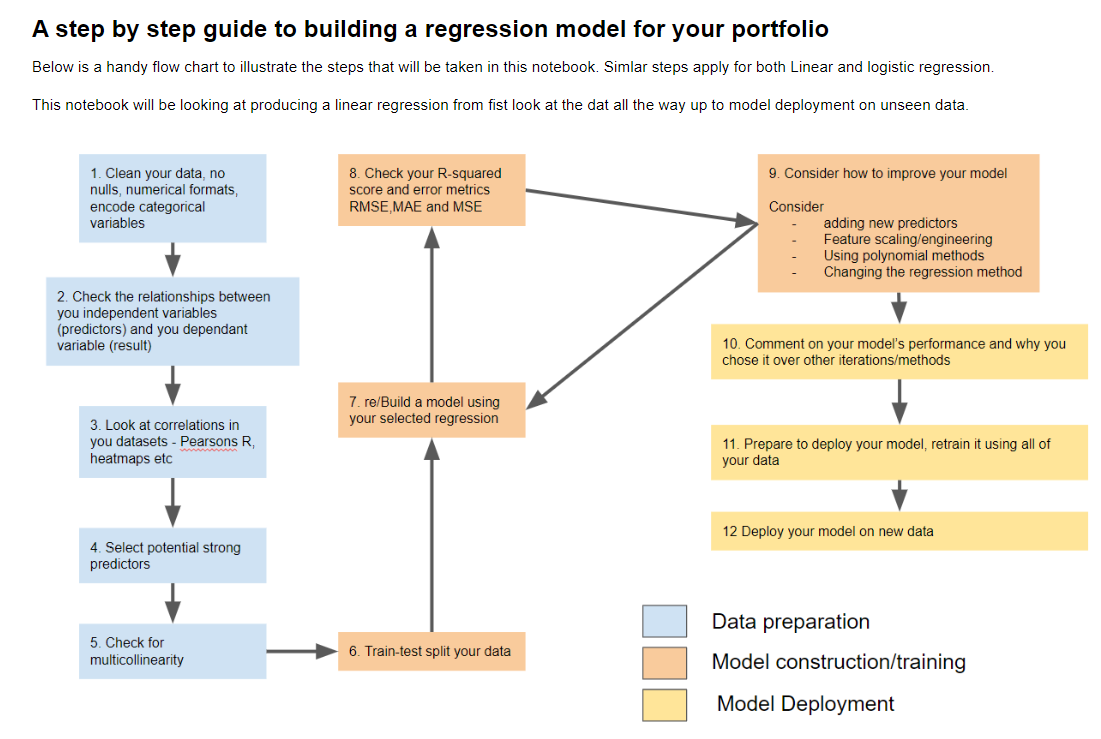

#### This is a flow chart you can use that has more detail to build more complicated projects